In [27]:
import pylab as pl
import pandas as pd
import sys
import os
import numpy as np
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


'/Users/andrewchen/PUIDATA'

In [10]:
import wget

In [63]:
wget.download('https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip')

u'201501-citibike-tripdata.zip'

In [69]:
os.system("mv 201501-citibike-tripdata.zip "+ os.getenv('PUIDATA'))

0

In [71]:
jan = pd.read_csv(os.getenv('PUIDATA')+'/201501-citibike-tripdata.zip')

In [72]:
jan.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


# IDEA: Women's bike riding duration are different with men's. The significance level is 0.05


Null hypothesis: Women's and men's bike riding duration follow the same distribution.

Alternative hypothesis: Women's and men's bike riding duration follow different distributions.


# Data cleanning

In [41]:
len(jan)

285552

In [40]:
sort(jan[jan.gender==1].tripduration)[-1000:]

array([ 2792,  2792,  2793,  2793,  2794,  2795,  2795,  2796,  2797,
        2797,  2798,  2799,  2800,  2800,  2800,  2801,  2801,  2802,
        2802,  2804,  2805,  2806,  2807,  2807,  2807,  2808,  2808,
        2809,  2809,  2811,  2812,  2813,  2814,  2814,  2815,  2817,
        2818,  2819,  2820,  2822,  2825,  2825,  2826,  2827,  2827,
        2827,  2829,  2830,  2836,  2836,  2837,  2839,  2839,  2840,
        2841,  2842,  2843,  2849,  2850,  2852,  2852,  2853,  2853,
        2854,  2857,  2857,  2861,  2865,  2865,  2866,  2868,  2869,
        2869,  2870,  2870,  2871,  2871,  2872,  2873,  2875,  2875,
        2876,  2878,  2879,  2881,  2884,  2885,  2885,  2887,  2890,
        2891,  2894,  2895,  2896,  2897,  2900,  2900,  2902,  2902,
        2902,  2902,  2904,  2905,  2909,  2909,  2910,  2911,  2911,
        2913,  2913,  2913,  2914,  2915,  2915,  2916,  2916,  2916,
        2918,  2920,  2920,  2924,  2925,  2926,  2926,  2927,  2927,
        2930,  2931,

In [45]:
bins = np.arange(0, 3000, 100)
bins=numpy.append(bins,43023)

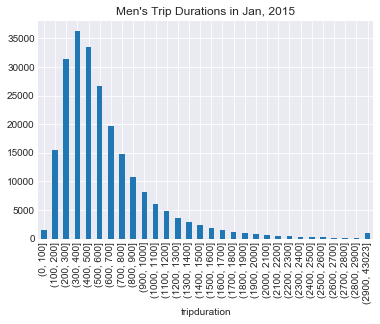

In [47]:
axd = jan[jan.gender==1].tripduration.groupby(pd.cut(jan[jan.gender==1].tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axd.set_title("Men's Trip Durations in Jan, 2015")

In [48]:
sort(jan[jan.gender==2].tripduration)[-1000:]

array([ 1992,  1992,  1992,  1994,  1994,  1994,  1994,  1994,  1995,
        1996,  1996,  1997,  1999,  1999,  2000,  2001,  2001,  2001,
        2002,  2002,  2002,  2003,  2003,  2004,  2004,  2004,  2004,
        2004,  2004,  2004,  2004,  2007,  2007,  2008,  2009,  2010,
        2010,  2012,  2012,  2012,  2013,  2013,  2013,  2013,  2014,
        2015,  2015,  2015,  2016,  2016,  2016,  2017,  2018,  2018,
        2018,  2019,  2020,  2021,  2021,  2023,  2023,  2023,  2023,
        2023,  2023,  2023,  2024,  2024,  2024,  2025,  2025,  2026,
        2026,  2027,  2028,  2029,  2029,  2030,  2030,  2030,  2030,
        2030,  2031,  2032,  2032,  2033,  2033,  2033,  2033,  2034,
        2034,  2034,  2035,  2035,  2036,  2037,  2038,  2039,  2039,
        2040,  2040,  2041,  2041,  2041,  2042,  2042,  2045,  2045,
        2045,  2046,  2046,  2047,  2047,  2047,  2050,  2050,  2050,
        2050,  2051,  2051,  2051,  2052,  2052,  2055,  2056,  2056,
        2057,  2058,

In [49]:
bins = np.arange(0, 3000, 100)
bins=numpy.append(bins,41961)

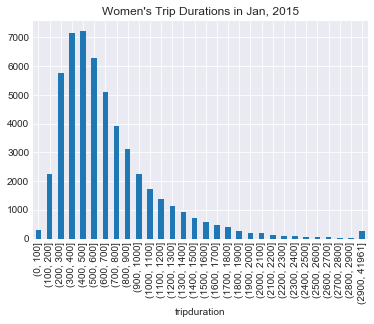

In [50]:
axd = jan[jan.gender==2].tripduration.groupby(pd.cut(jan[jan.gender==2].tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axd.set_title("Women's Trip Durations in Jan, 2015")

# Remove the outliers which are timedurations that is larger than 3000.

In [54]:
jan = jan[jan.tripduration<=3000]

In [55]:
print("Men's mean bike riding duration in January is {}.".format(jan[jan.gender==1].tripduration.mean()))

Men's mean bike riding duration in January is 592.113336917.


In [59]:
print("Women's mean bike riding duration in January is {}.".format(jan[jan.gender==2].tripduration.mean()))

Women's mean bike riding duration in January is 657.966854983.


# Conduct a Mann Whitney U test

The null hypothesis of Mann Whitney U test is that two independent samples were selected from population having the same distribution.

In [61]:
import scipy.stats as st

In [62]:
st.mannwhitneyu(jan[jan.gender==1],jan[jan.gender==2])

MannwhitneyuResult(statistic=-433265838094.5, pvalue=0.0)

Since p-value is less than 0.05, the null hypothesis is rejected. Thus, women's and men's bike riding duration follow different distributions.